In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../data/crawler/unified-events-statistics.csv')
def qtd_eventos(integer):
    return 45 - integer

qtd_eventos = list(map(qtd_eventos, df.isnull().sum(axis=1).tolist()))
df['qtd_eventos'] = qtd_eventos

In [3]:
df = df.drop(['golId','game','event4','event5','event6','event7','event8','event9','event10','event11','event12','event13','event14','event15','event16','event17','event18','event19','event20','event21','event22','event23','event24','event25','event26','event27','event28','event29','event30','event31','event32','event33','event34','event35','event36','event37','event38','event39','event40','event41','event42','event43','event44','event45'],axis=1)
y = df.result
df = df.replace(['BLUE: first_blood',
    'BLUE: dragon',
    'BLUE: herald',
    'BLUE: first_tower_top',
    'BLUE: first_tower_mid',
    'BLUE: first_tower_bot',
    'BLUE: second_tower_top',
    'BLUE: second_tower_mid',
    'BLUE: second_tower_bot',
    'BLUE: third_tower_top',
    'BLUE: third_tower_mid',
    'BLUE: third_tower_bot',
    'BLUE: inhibitor_top',
    'BLUE: inhibitor_mid',
    'BLUE: inhibitor_bot',
    'BLUE: baron',
    'BLUE: elder_dragon',
    'BLUE: nexus_tower',
    'BLUE: nexus',
    'RED: first_blood',
    'RED: dragon',
    'RED: herald',
    'RED: first_tower_top',
    'RED: first_tower_mid',
    'RED: first_tower_bot',
    'RED: second_tower_top',
    'RED: second_tower_mid',
    'RED: second_tower_bot',
    'RED: third_tower_top',
    'RED: third_tower_mid',
    'RED: third_tower_bot',
    'RED: inhibitor_top',
    'RED: inhibitor_mid',
    'RED: inhibitor_bot',
    'RED: baron',
    'RED: elder_dragon',
    'RED: nexus_tower',
    'RED: nexus'], range(38))
x = df.drop(['result'],axis=1)
df.head()

,event1,event2,event3,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,blueJungleKDA,blueMidGP,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
0,19,1,2,1,1.00,2.0,1,1.0,2.3,1,...,0.71,4.2,1,0.00,2.5,1,1.00,7.0,1,28
1,19,21,1,5,0.60,5.6,2,0.0,1.1,9,...,0.38,3.2,21,0.57,3.3,6,0.83,4.1,0,20
2,19,2,20,0,0.00,0.0,1,1.0,3.3,0,...,0.80,4.8,1,0.00,0.8,5,0.60,3.2,0,31
3,20,0,21,23,0.61,3.6,5,0.2,1.6,8,...,0.67,3.9,34,0.74,7.3,2,0.00,2.0,0,25
4,19,1,2,3,1.00,9.8,2,1.0,7.0,1,...,0.40,2.4,2,1.00,24.0,1,1.00,6.0,0,23


In [4]:
df.describe()

,event1,event2,event3,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,blueJungleKDA,blueMidGP,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
count,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,...,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000
mean,10.073219,11.012421,10.878187,8.290695,0.445646,2.990499,7.516888,0.440013,3.472913,7.623883,...,0.428804,3.984703,9.437132,0.442423,4.410939,10.222924,0.447616,3.495990,0.511005,24.032905
std,9.524728,9.469175,9.455684,10.300754,0.328620,2.788213,9.772053,0.328172,3.189202,10.734723,...,0.342670,4.218179,11.889853,0.318597,4.213041,12.471405,0.319078,3.846075,0.499933,3.894255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,0.000000,1.000000,2.000000,1.000000,0.000000,1.400000,1.000000,0.000000,1.600000,1.000000,...,0.000000,1.400000,1.000000,0.000000,2.200000,1.000000,0.000000,1.700000,0.000000,21.000000
50%,19.000000,19.000000,4.000000,5.000000,0.500000,2.700000,5.000000,0.500000,3.200000,4.000000,...,0.500000,3.400000,5.000000,0.500000,3.900000,6.000000,0.500000,2.800000,1.000000,24.000000
75%,19.000000,20.000000,21.000000,11.000000,0.670000,3.900000,10.000000,0.670000,4.600000,10.000000,...,0.670000,5.100000,13.000000,0.670000,5.600000,15.000000,0.670000,4.200000,1.000000,26.000000
max,21.000000,24.000000,24.000000,79.000000,1.000000,38.000000,95.000000,1.000000,37.000000,114.000000,...,1.000000,60.000000,129.000000,1.000000,53.000000,115.000000,1.000000,50.000000,1.000000,41.000000


# of blue team victory:  2345
# of red team victory:  2244


c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



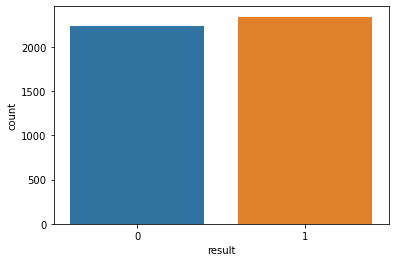

In [5]:
ax = sns.countplot(y)
B, M = y.value_counts()
print('# of blue team victory: ', B)
print('# of red team victory: ', M)

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



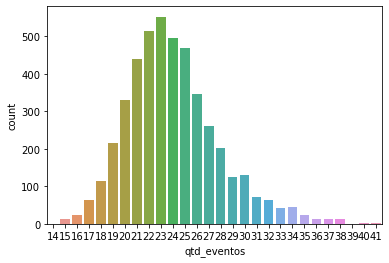

In [6]:
ax = sns.countplot(df['qtd_eventos'])

<AxesSubplot:>

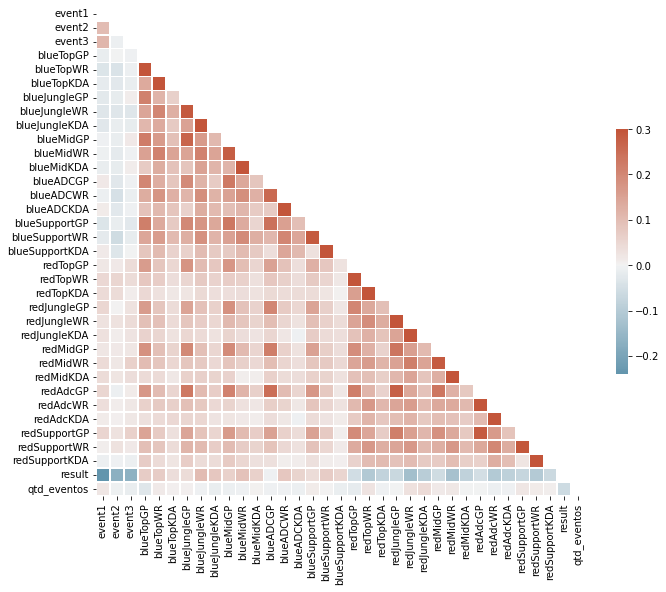

In [7]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 0.98, 'Relação entre qtd de eventos e vencedor')

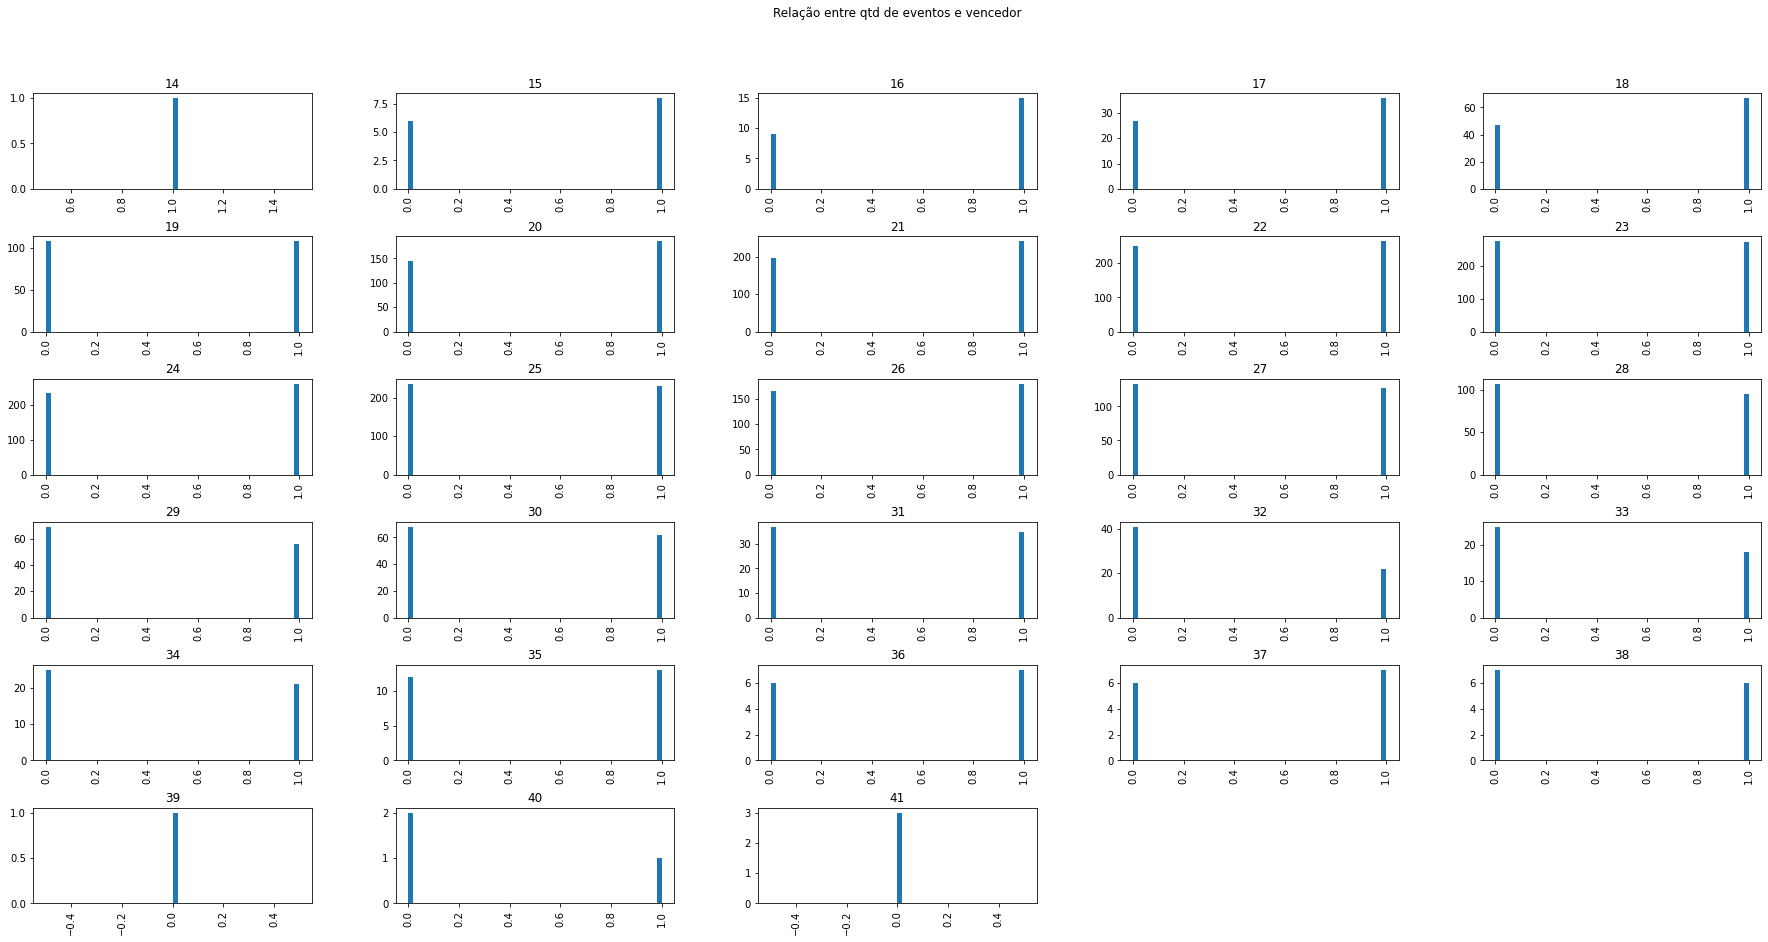

In [8]:
df.hist(column='result', by='qtd_eventos', bins=50,figsize=(30,15))
plt.suptitle('Relação entre qtd de eventos e vencedor')

In [9]:
features = ['event1','event2','event3','blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['result'])
fig.show()

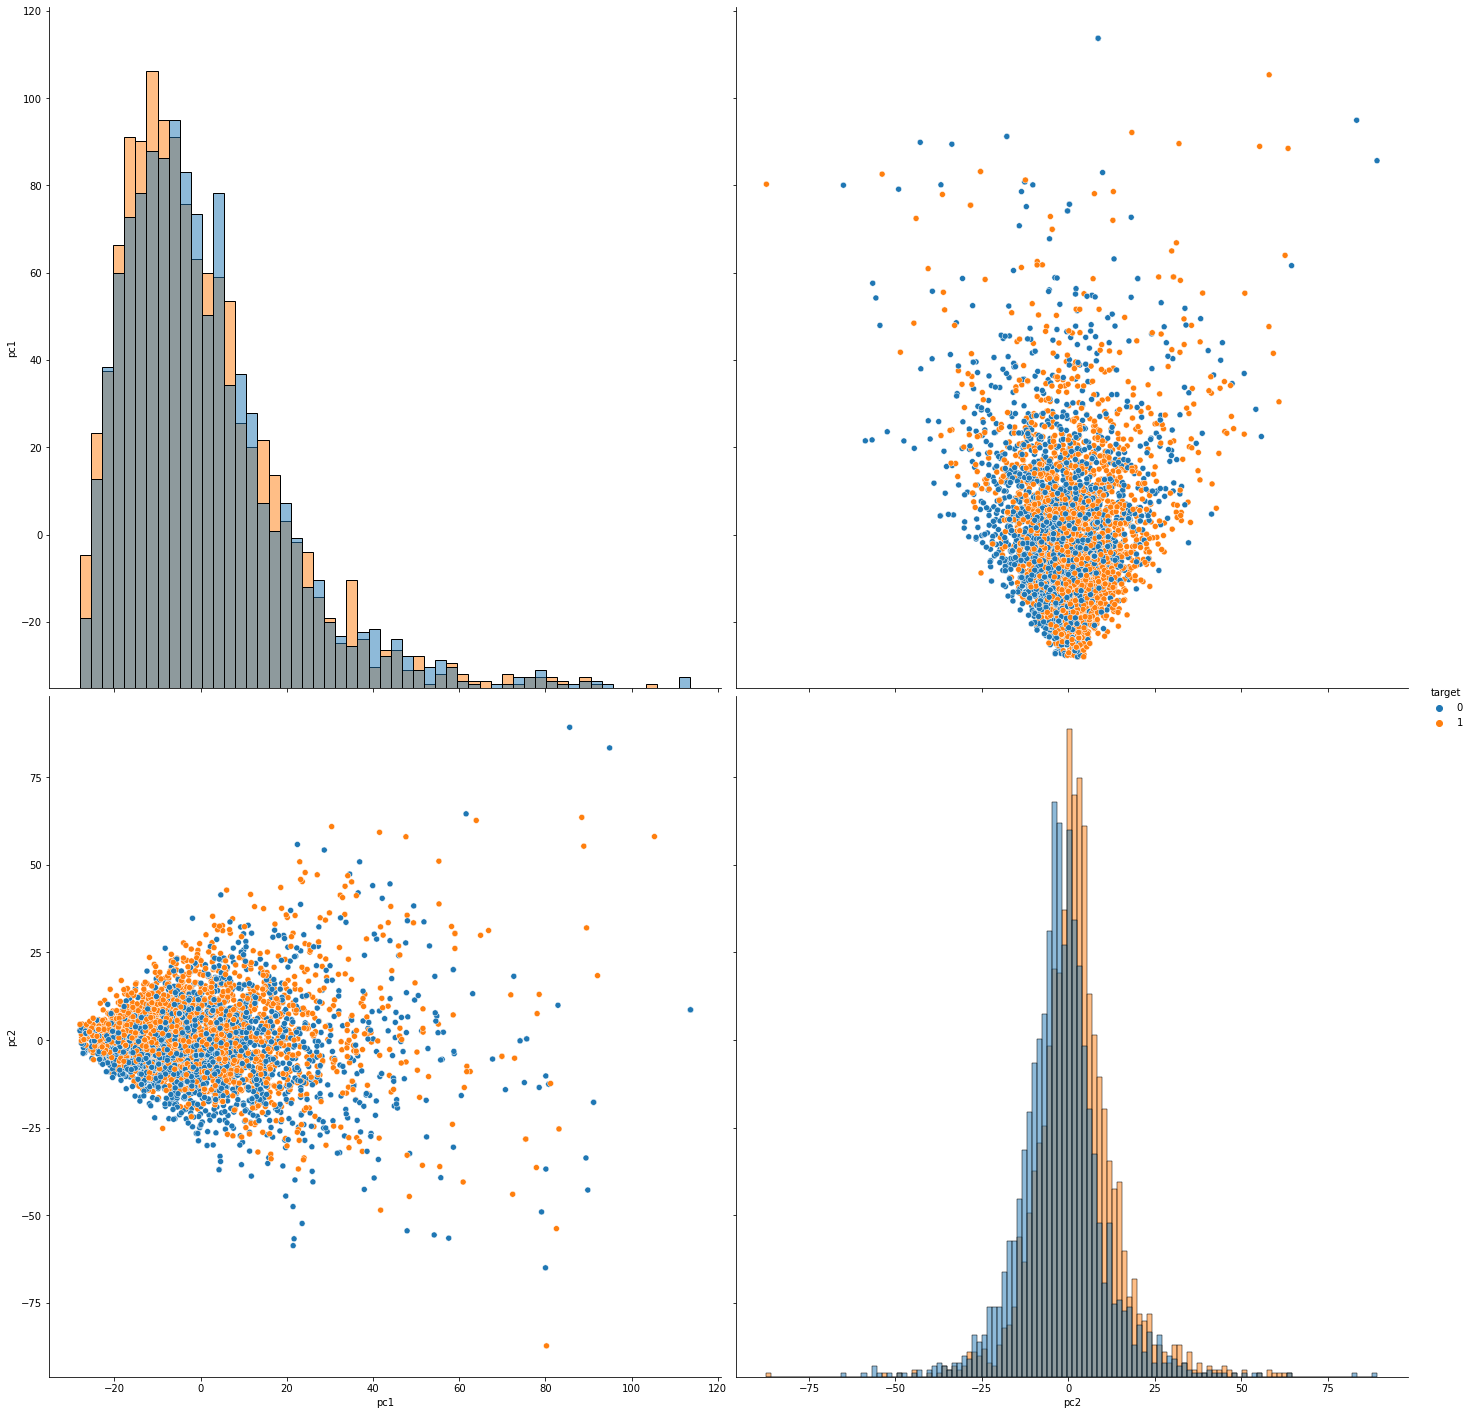

In [10]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
new_df = pd.DataFrame(X_transformed, columns=['pc1', 'pc2'])
new_df['target'] = df['result']
sns.pairplot(new_df, vars=['pc1', 'pc2'],hue='target', diag_kind='hist',height=10)
plt.show()

In [11]:
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline


pca = Pipeline([("standarize", StandardScaler()), ("pca",PCA(n_components = 3)), ("dataframe", FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["First Comp", "Second Comp", "Third Comp"])))]).fit(X)
X3D = pca.transform(X)
px.scatter_3d(x = "First Comp", y = "Second Comp",z = "Third Comp", data_frame= X3D, color= y)

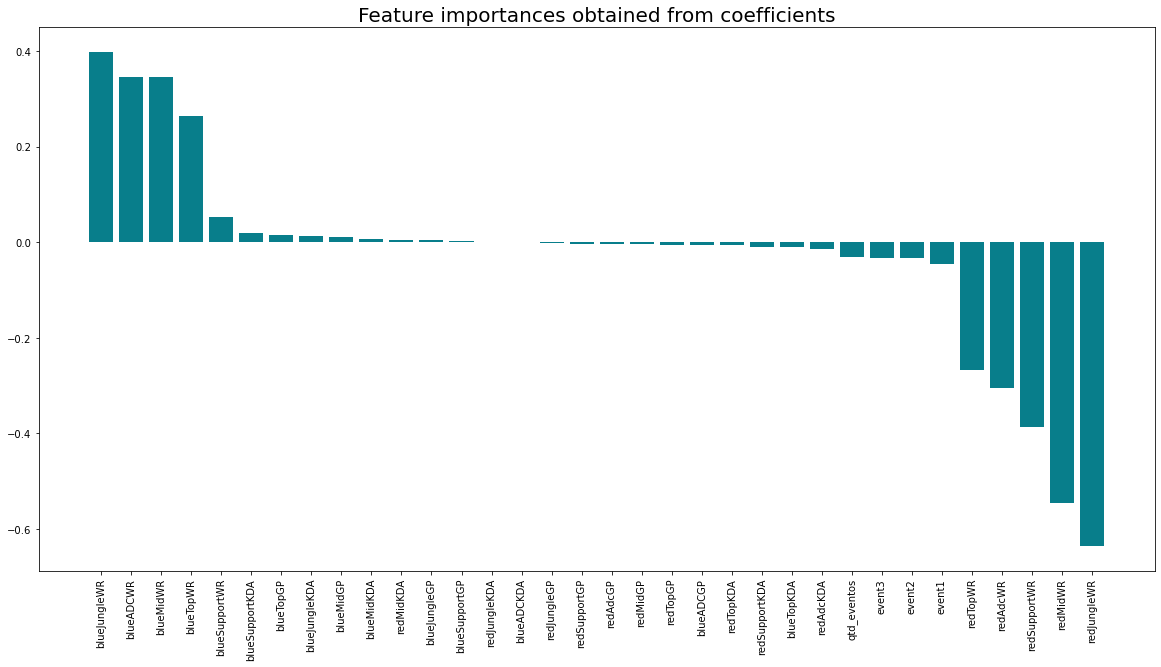

In [12]:
# Fonte dos plots abaixo: https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.rcParams["figure.figsize"] = (20, 10)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

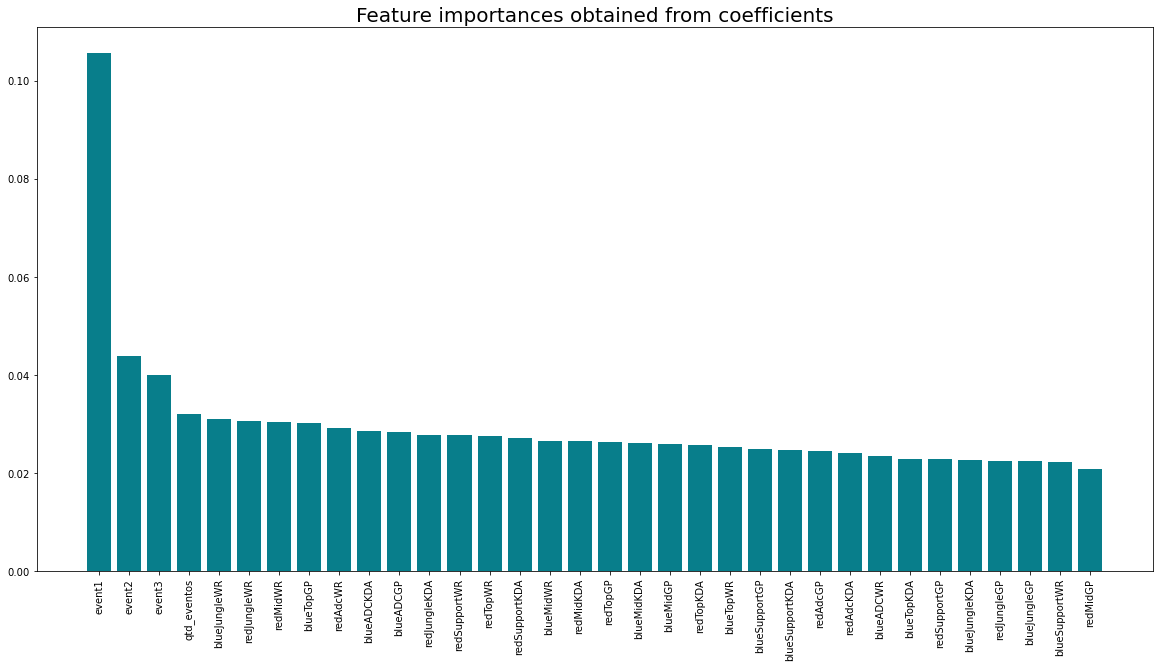

In [13]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

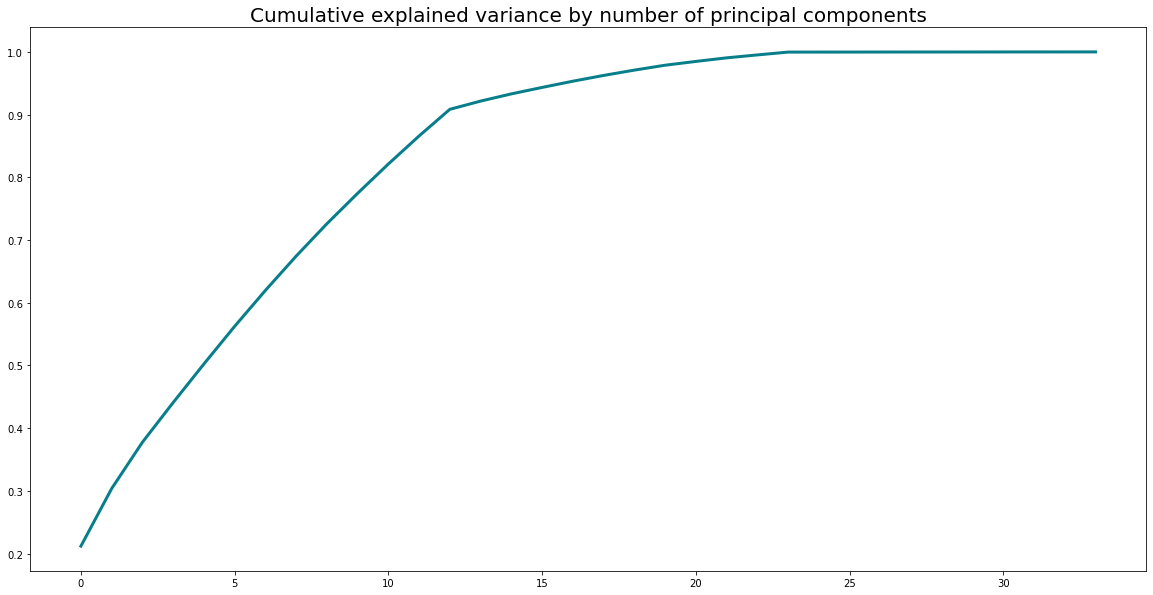

In [14]:
from sklearn.decomposition import PCA

pca = PCA().fit(x)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [15]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(x.columns) + 1)],
    index=x.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
event1,0.375994,-2.342171,-0.054076,1.684787,-5.971548,2.306238,-2.635646,0.383356,-0.375200,-1.829787,...,-0.000111,0.000097,0.000063,0.000123,-0.000022,-0.000022,0.000109,-0.000031,0.000136,0.000013
event2,-0.036565,-1.114034,-0.868127,-0.307041,-4.606952,1.704313,0.677869,6.492115,1.579950,1.094199,...,-0.000050,0.000323,-0.000122,0.000152,0.000031,-0.000138,0.000128,0.000012,-0.000078,0.000009
event3,0.350299,-1.830793,-0.362954,-0.206326,-4.192938,0.001018,-3.242625,-5.741563,-1.555255,0.064346,...,0.000086,0.000305,0.000071,0.000101,0.000081,0.000061,-0.000060,-0.000005,-0.000065,-0.000104
blueTopGP,4.828612,1.599727,0.829664,-3.321308,-0.529844,-2.048997,-0.551101,2.592237,-6.953397,-2.481403,...,0.000743,-0.000411,-0.000025,-0.000285,0.000839,-0.000121,-0.000500,-0.000069,0.000088,-0.000279
blueTopWR,0.078550,0.030288,0.012675,-0.032658,0.006017,-0.024403,-0.012364,0.014571,-0.046861,-0.019407,...,-0.089443,0.046407,0.048922,0.064895,-0.147858,0.019925,0.094592,0.012131,-0.019350,0.044662


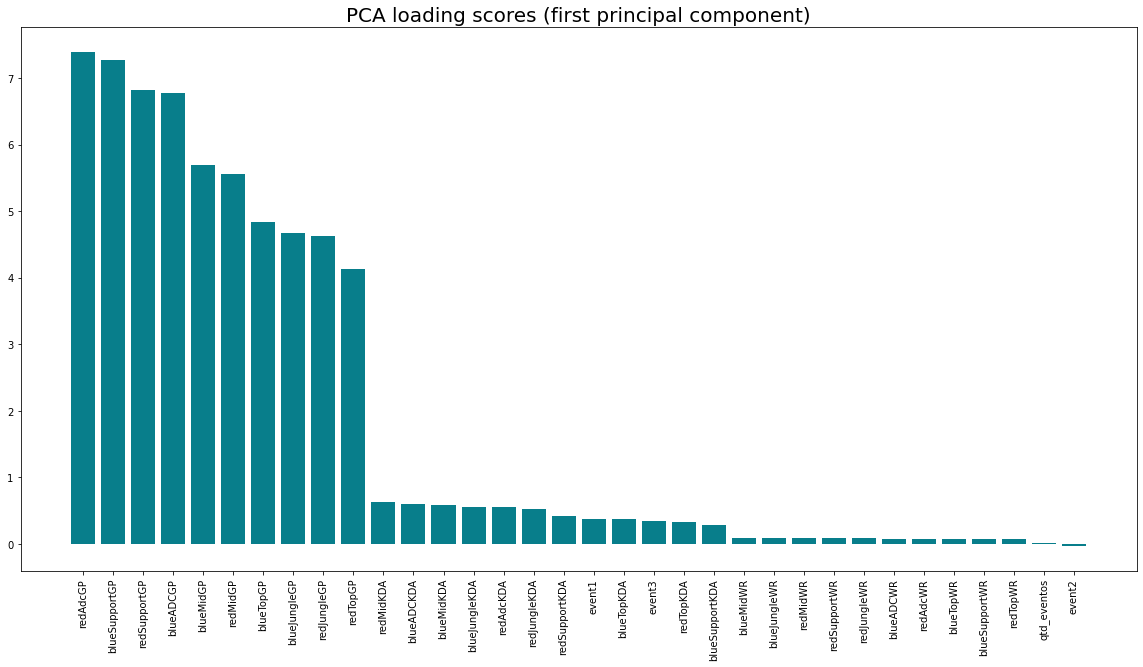

In [16]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4589 samples in 0.001s...
[t-SNE] Computed neighbors for 4589 samples in 0.760s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4589
[t-SNE] Computed conditional probabilities for sample 2000 / 4589
[t-SNE] Computed conditional probabilities for sample 3000 / 4589
[t-SNE] Computed conditional probabilities for sample 4000 / 4589
[t-SNE] Computed conditional probabilities for sample 4589 / 4589
[t-SNE] Mean sigma: 8.211905
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.331978
[t-SNE] KL divergence after 300 iterations: 2.254507
